In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = pd.read_csv('metadata.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:\n")
print(dataset.head())

# Display the shape of the dataset
print("\nShape of the dataset:\n")
print(dataset.shape)

#display data types of each column
print("\n the data type of each column are: \n")
print(dataset.dtypes)

# Check for missing values
print("\n Missing values in each column:\n")
print(dataset.isnull().sum())


# display basic stataistics ot the dataset
print("\n Basic statistics of the dataset:\n")
print(dataset.describe().round(4))

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\1988766269.py:6: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('metadata.csv')


First few rows of the dataset:

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# creating a copy of the original dataset
data_cop = dataset.copy()

#handling missing values
# calculating the 30% threshold for missing values in the columns
threshold = len(data_cop) * 0.3
print(f"\n Dropping columns with more than 30% missing values which = {threshold} missing values:\n")

# dropping columns with more than 30% missing values
data_cop = data_cop.drop(columns=["mag_id", "arxiv_id", "pmc_json_files", "pdf_json_files", "doi", "pubmed_id","pmcid", "who_covidence_id", "sha","s2_id"])

# dropping rows with any missing values
data_cop = data_cop.dropna(subset=["title", "authors"])

# filling missing values in 'journal' column with 'Unknown'
data_cop['journal'] = data_cop['journal'].fillna('Unkown')

# filling missing values in 'abstract' column with 'No abstract available'
data_cop['abstract'] = data_cop['abstract'].fillna('No abstract available')

#filling missing value in url column with 'No url available'
data_cop['url'] = data_cop['url'].fillna('No url available')

# filling missing values in 'publish_time' column with the mode (most frequent value)
# mode of the 'publish_time' column
mode_publish_time = data_cop['publish_time'].mode()

#filling missing values in 'publish_time' column with the mode
data_cop['publish_time'] = data_cop['publish_time'].fillna(mode_publish_time[0])

# list of remaining columns with missing values
print("\n Remaining columns with missing values:\n")
print (data_cop.isnull().sum())


# Convert date columns to datetime format
data_cop['publish_time'] = pd.to_datetime(data_cop['publish_time'], errors='coerce')

# Extract year from 'publish_time' column
data_cop['publish_year'] = data_cop['publish_time'].dt.year

# Display the first few rows of the cleaned dataset
print("\n First few rows of the cleaned dataset:\n")
print(data_cop.head())

#creating a new version of the dataset with cleaned data
data_cop.to_csv('cleaned_metadata.csv', index=False)
print("\n Cleaned dataset saved to 'cleaned_metadata.csv'\n")


 Dropping columns with more than 30% missing values which = 316998.0 missing values:


 Remaining columns with missing values:

cord_uid        0
source_x        0
title           0
license         0
abstract        0
publish_time    0
authors         0
journal         0
url             0
dtype: int64

 First few rows of the cleaned dataset:

   cord_uid source_x                                              title  \
0  ug7v899j      PMC  Clinical features of culture-proven Mycoplasma...   
1  02tnwd4m      PMC  Nitric oxide: a pro-inflammatory mediator in l...   
2  ejv2xln0      PMC    Surfactant protein-D and pulmonary host defense   
3  2b73a28n      PMC               Role of endothelin-1 in lung disease   
4  9785vg6d      PMC  Gene expression in epithelial cells in respons...   

  license                                           abstract publish_time  \
0   no-cc  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1   no-cc  Inflammatory diseases of the respirato

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('cleaned_metadata.csv')

#Count papers by publication year
paper_counts = data.groupby('publish_year') ['title'].count()
print("\n Number of papers published each year:\n")
print(paper_counts)

#Identify top journals publishing COVID-19 research
top_journals = data.groupby("journal")["title"].count().sort_values(ascending=False)
print("\n Top journals publishing COVID-19 research:\n")
print(top_journals.head(10))

# Combine all titles into a single string
all_titles = " ".join(data_cop["title"].dropna().astype(str))

# Split the string into individual words
words = all_titles.split()

# Count the frequency of each word
word_freq = pd.Series(words).value_counts().sort_values(ascending=False)

# Display the most common words in titles
print("\n Most common words in titles:\n")
print(word_freq.head(20))


 Number of papers published each year:

publish_year
1955.0         1
1957.0         2
1961.0         1
1962.0         1
1963.0         1
           ...  
2020.0    159438
2021.0    213946
2022.0     83058
2023.0         1
2024.0         1
Name: title, Length: 64, dtype: int64

 Top journals publishing COVID-19 research:

journal
Unkown                             86320
PLoS One                            9927
bioRxiv                             8961
Int J Environ Res Public Health     8199
BMJ                                 6698
Sci Rep                             5929
Cureus                              4211
Front Psychol                       3541
BMJ Open                            3503
Front Immunol                       3440
Name: title, dtype: int64

 Most common words in titles:

of            702814
and           530650
in            507969
the           455712
COVID-19      332654
for           202759
a             200034
to            158744
A             139587
with      

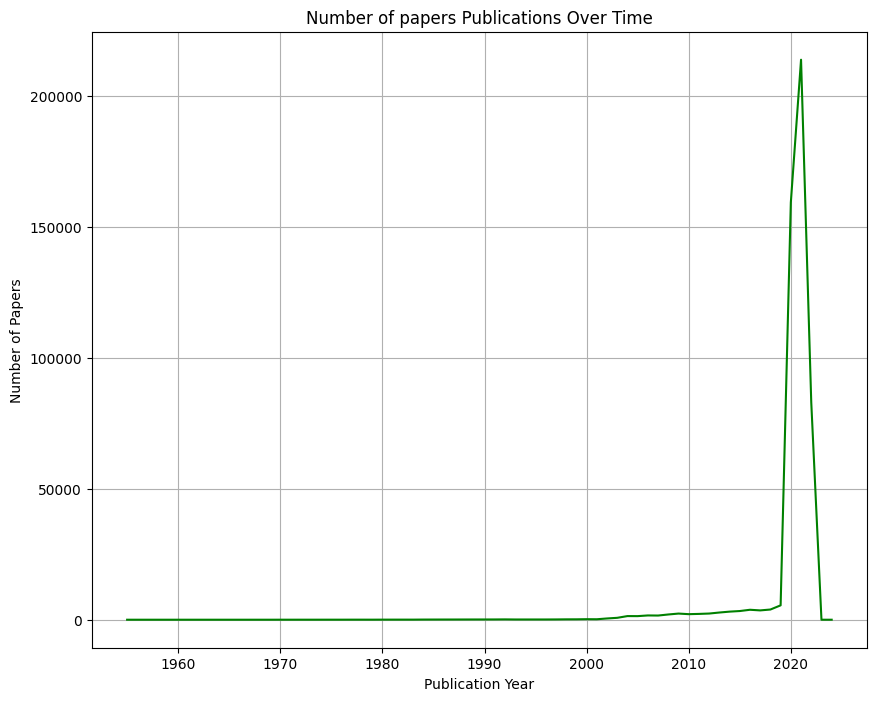

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\638520221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.index[:10], y=top_journals.values[:10], palette='viridis')


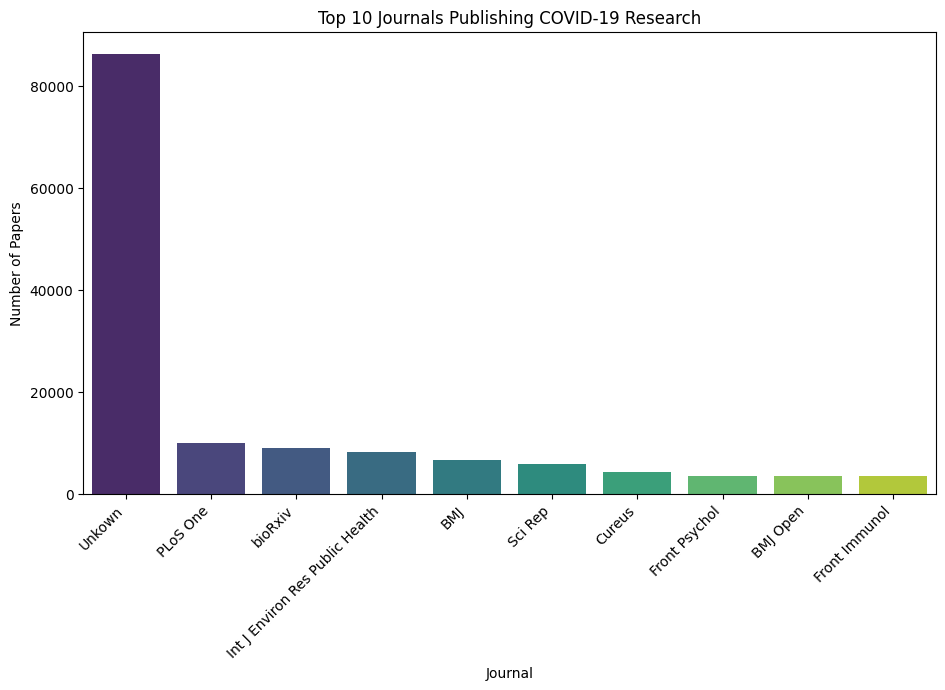

C:\Users\HP\AppData\Local\Temp\ipykernel_6724\638520221.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=url_count.index[:10], y=url_count.values[:10], palette='viridis')  # top 10 only


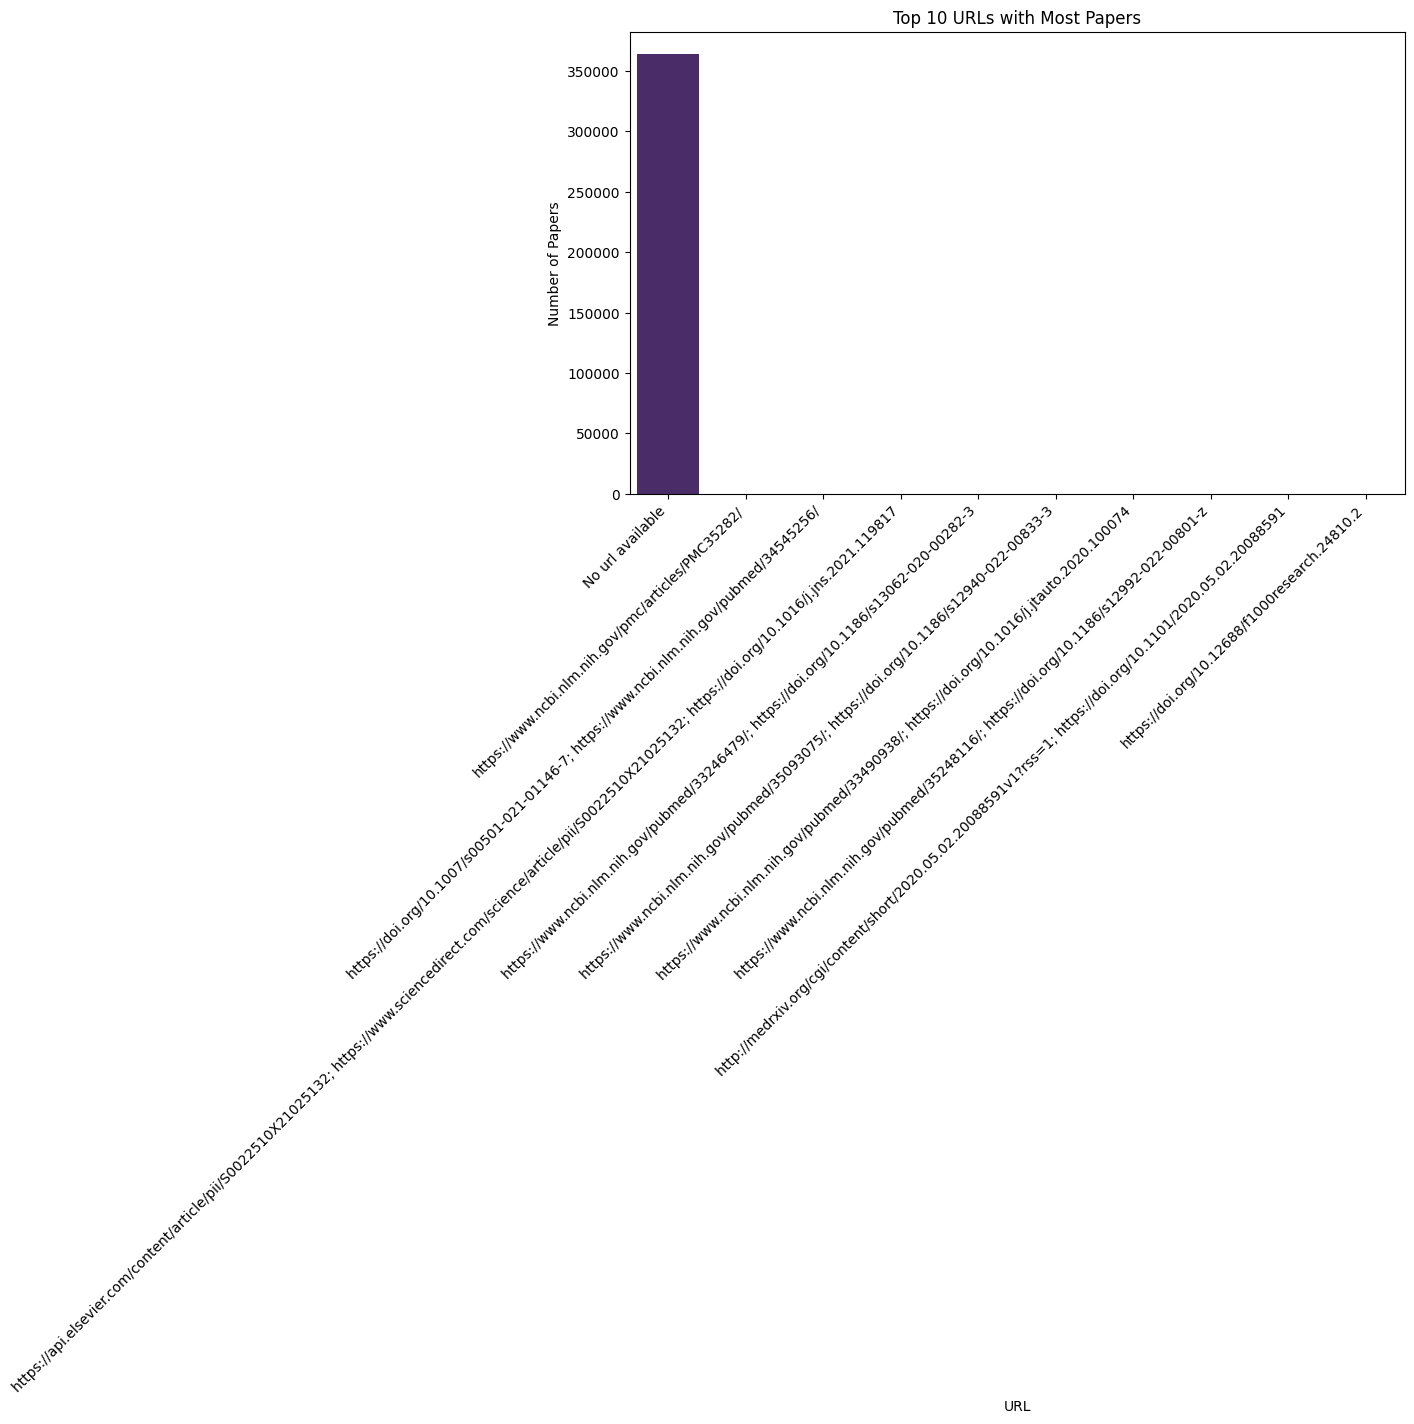

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Plot number of publications over time
plt.figure(figsize=(10, 8))
year = data.groupby("publish_year")["title"].count().sort_values(ascending=True)
paper_count = year.values
sns.lineplot(x=year.index, y=paper_count,color= 'green', markers='o')
plt.title("Number of papers Publications Over Time")
plt.xlabel("Publication Year")
plt.ylabel("Number of Papers")
plt.grid()
plt.show()


#Plot top 10 journals publishing COVID-19 research
plt.figure(figsize=(11, 6))
sns.barplot(x=top_journals.index[:10], y=top_journals.values[:10], palette='viridis')
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Journal")   
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot distribution of paper counts by source
url_count = data['url'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=url_count.index[:10], y=url_count.values[:10], palette='viridis')  # top 10 only
plt.title("Top 10 URLs with Most Papers")
plt.xlabel("URL")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.show()